In [ ]:
import numpy as np
import pandas as pd
housing=pd.read_csv("/content/housing.csv")
housing.head()#shows first 5 rows and if you want the name of the columns do df.columns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isnull().sum()
housing.dropna(inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
NewHouse=housing.dropna()
NewHouse.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X=housing[["longitude","latitude", "housing_median_age", "total_rooms","total_bedrooms","population","households","median_income"]]

Y=housing["median_house_value"]

In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=32)

reg=LinearRegression()
reg.fit(X_train,y_train)

yPred=(reg.predict(X_test))

print("RSME:",sqrt(mean_squared_error(y_test,yPred)))#Root-mean-square deviation(RSME)


RSME: 68808.45484403682


In [ ]:
from sklearn.preprocessing import LabelEncoder#this is changing the ocean proximity from a string to some numerical value 
le=LabelEncoder()
housing["ocean_proximity_encoded"]=le.fit_transform(NewHouse["ocean_proximity"])
NewHouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


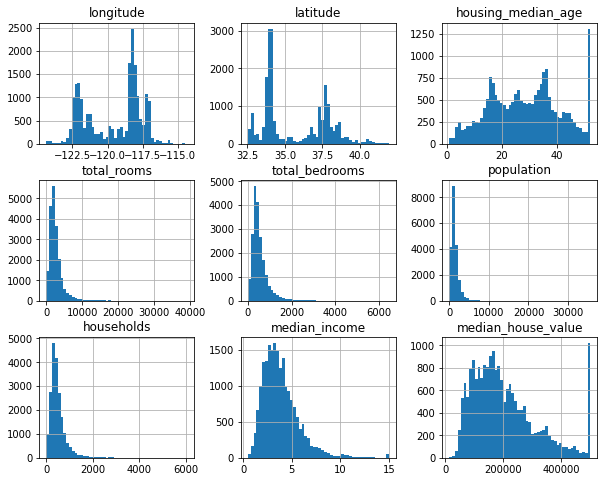

In [ ]:
import matplotlib.pyplot as plt

NewHouse.hist(bins=50,figsize=(10,8))
plt.show()

In [ ]:
corr_matrix=NewHouse.corr()#this is a correlation
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


In [ ]:
NewHouse["rooms_per_household"]=NewHouse["total_rooms"]/NewHouse["households"]
NewHouse["bedrooms_per_room"]=NewHouse["total_bedrooms"]/NewHouse["total_rooms"]
NewHouse["population_per_household"]=NewHouse["population"]/NewHouse["households"]#here we have created new variables and then we can add them to the new list on the bottom code

In [ ]:
X=NewHouse[["longitude","latitude", "housing_median_age", "total_rooms",
            "total_bedrooms","population","households","median_income","population_per_household","bedrooms_per_room","rooms_per_household"]]
Y=NewHouse["median_house_value"]

In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=32)

reg=LinearRegression()
reg.fit(X_train,y_train)

yPred=(reg.predict(X_test))

print("RSME:",sqrt(mean_squared_error(y_test,yPred)))#Root-mean-square deviation(RSME)


RSME: 69636.07613006794
